<a href="https://colab.research.google.com/github/EmilSeyfullayev/azpromo-case-task-interview/blob/main/1_2_AZPROMO_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing necessary packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_style('whitegrid')

### Reading data and initial description

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/AzPromo/Tasks for candidates.xlsx")

In [ ]:
# df.describe(include='all').T

In [ ]:
df.shape

(65514, 18)

In [ ]:
df.head(2)

,Index,Bəyannamənin tarixi,Ümumi sahə,Kod 2,Ad 2,Kod 4,Ad 4,Kod 6,Ad 6,Malın kodu,Miqdarı,Ölçü vaxidi,Tam qiyməti manatla,ABŞ dolları ilə,Vahidinin qiyməti (ABŞ dolları ilə),Tərəfdaş ölkə,İstehsalçı ölkə,Nəqliyyatın tipi
0,1,2020-01-01,Sənaye məhsulları,39,Plastmassa və onlardan hazırlanan məmulatlar,3901,"Etilen polimerləri, ilkin formalarda",390110,"Xüsusi kütləsi 0,94-dən az olan ilkin formalı ...",3901109000,22500.0,kq,26163.0,15390.0,0.684,ÇİN,AZƏRBAYCAN,Avtomobil nəqliyyatı vasitələri
1,2,2020-01-02,Sənaye məhsulları,39,Plastmassa və onlardan hazırlanan məmulatlar,3901,"Etilen polimerləri, ilkin formalarda",390110,"Xüsusi kütləsi 0,94-dən az olan ilkin formalı ...",3901109000,22500.0,kq,26163.0,15390.0,0.684,ÇİN,AZƏRBAYCAN,Avtomobil nəqliyyatı vasitələri


In [ ]:
# df.iloc[:, 1:]

In [ ]:
len(df.iloc[:, 1:].drop_duplicates()) # if numbers are the same there is no similar rows

54744

In [ ]:
df = df.iloc[:, 1:].drop_duplicates().reset_index(drop=True)

In [ ]:
df.head(2)

,Bəyannamənin tarixi,Ümumi sahə,Kod 2,Ad 2,Kod 4,Ad 4,Kod 6,Ad 6,Malın kodu,Miqdarı,Ölçü vaxidi,Tam qiyməti manatla,ABŞ dolları ilə,Vahidinin qiyməti (ABŞ dolları ilə),Tərəfdaş ölkə,İstehsalçı ölkə,Nəqliyyatın tipi
0,2020-01-01,Sənaye məhsulları,39,Plastmassa və onlardan hazırlanan məmulatlar,3901,"Etilen polimerləri, ilkin formalarda",390110,"Xüsusi kütləsi 0,94-dən az olan ilkin formalı ...",3901109000,22500.0,kq,26163.0,15390.0,0.684,ÇİN,AZƏRBAYCAN,Avtomobil nəqliyyatı vasitələri
1,2020-01-02,Sənaye məhsulları,39,Plastmassa və onlardan hazırlanan məmulatlar,3901,"Etilen polimerləri, ilkin formalarda",390110,"Xüsusi kütləsi 0,94-dən az olan ilkin formalı ...",3901109000,22500.0,kq,26163.0,15390.0,0.684,ÇİN,AZƏRBAYCAN,Avtomobil nəqliyyatı vasitələri


In [ ]:
df.describe(include='all').T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Bəyannamənin tarixi,54744,241,2021-02-19 00:00:00,655,2020-01-01,2021-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ümumi sahə,54744,4,Sənaye məhsulları,27099,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kod 2,54744.0,NaN,NaN,NaN,NaT,NaT,41.712206,30.416453,1.0,8.0,38.0,73.0,97.0
Ad 2,54744,91,Tərəvəz və bəzi yeməli meyvəköklülər və kök yu...,8410,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kod 4,54744.0,NaN,NaN,NaN,NaT,NaT,4182.890947,3046.502863,101.0,810.0,3824.0,7308.0,9706.0
Ad 4,54744,737,"Tomat, təzə və ya soyudulmuş",4987,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kod 6,54744.0,NaN,NaN,NaN,NaT,NaT,418321.9083,304654.813381,10129.0,81070.0,382440.0,730840.0,970600.0
Ad 6,54744,1844,"Tomat, təzə və ya soyudulmuş",4987,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Malın kodu,54744.0,NaN,NaN,NaN,NaT,NaT,4183222659.673042,3046548743.329159,101291000.0,810700000.0,3824400000.0,7308400009.0,9706000000.0
Miqdarı,54658.0,NaN,NaN,NaN,NaT,NaT,26691.738762,363128.43753,0.0,75.0,16800.0,21846.0,39942335.0


In [ ]:
temp = df['Tərəfdaş ölkə'].value_counts().head(20).reset_index()
temp['faiz'] = round(temp['Tərəfdaş ölkə']/len(df)*100)
temp

,index,Tərəfdaş ölkə,faiz
0,RUSİYA,16875,31.0
1,GÜRCÜSTAN,9496,17.0
2,TÜRKİYƏ,9303,17.0
3,BÖYÜK BRİTANİYA,2654,5.0
4,ALMANİYA,1899,3.0
5,ABŞ,1231,2.0
6,UKRAYNA,1182,2.0
7,BİRLƏŞMİŞ ƏRƏB ƏM,1065,2.0
8,QAZAXISTAN,947,2.0
9,NİDERLAND,929,2.0


In [ ]:
df['Tərəfdaş ölkə'].value_counts().tail(20)

YƏMƏN                5
PAPUA-YENİ QVİNEY    5
BƏHREYN              4
QANA                 4
KOT-D'İVUAR          3
MAROKKO              3
BANQLADEŞ            3
KİPR                 3
KUBA                 1
SERRA-LEONE          1
LİVAN                1
KAMBOCA              1
MONTENEQRO           1
BOLİVİYA             1
FƏLƏSTİN             1
BRUNEY               1
VİRGİN ADALARI (B    1
MOZAMBİK             1
MARŞALLOVI ADALAR    1
KAMERUN              1
Name: Tərəfdaş ölkə, dtype: int64

In [ ]:
len(df['Tərəfdaş ölkə'].unique()) # Total number of unique values

105

In [ ]:
len(df['İstehsalçı ölkə'].unique())

89

In [ ]:
temp = df['Ad 6'].value_counts().reset_index()
temp['faiz'] = round(temp['Ad 6']/len(df)*100, 1) # Ad 6
temp.head(10)

,index,Ad 6,faiz
0,"Tomat, təzə və ya soyudulmuş",4987,9.1
1,Sement klinkerləri,4899,8.9
2,"Pambıq lifi, daranmaya məruz qalmamış",4411,8.1
3,"Xurma, təzə",2037,3.7
4,"Alma, təzə",2013,3.7
5,"Salat tərəvəzi, salat-kahıdan və kasnıdan başq...",819,1.5
6,Pambıq yağının ekstraksiyası nəticəsində alına...,709,1.3
7,Dəmirdən və ya aşqarlanmamış poladdan isti yay...,657,1.2
8,"Kartof, təzə və ya soyudulmuş, digərləri",621,1.1
9,İlkin formalı polipropilen,566,1.0


In [ ]:
temp = df['Ad 4'].value_counts().reset_index()
temp['faiz'] = round(temp['Ad 4']/len(df)*100, 1) # Ad 4
temp.head(10)

,index,Ad 4,faiz
0,"Tomat, təzə və ya soyudulmuş",4987,9.1
1,"Portlandsement, giltorpaqlı sement, şlaklı sem...",4923,9.0
2,"Pambıq lifi, kardo və daraqla daranmaya məruz ...",4411,8.1
3,"Digər meyvələr, təzələr",2535,4.6
4,"Almalar, armudlar və heyvalar, təzə",2112,3.9
5,"Digər tərəvəz, təzə və ya soyudulmuşlar",1548,2.8
6,"Etilen polimerləri, ilkin formalarda",824,1.5
7,"Qalınlığı 0,20 mm-dən çox alüminium plitələr, ...",819,1.5
8,Dəmirdən və ya aşqarlanmamış poladdan yarımfab...,720,1.3
9,"Propilen və ya digər olefinlərin polimerləri, ...",715,1.3


In [ ]:
temp = df['Ad 2'].value_counts().reset_index()
temp['faiz'] = round(temp['Ad 2']/len(df)*100, 1)
temp.head(10)

,index,Ad 2,faiz
0,Tərəvəz və bəzi yeməli meyvəköklülər və kök yu...,8410,15.4
1,Duz; kükürd; torpaq və daş; suvaq materialları...,5592,10.2
2,Yeməli meyvələr və qoz-fındıq; sitrus meyvələr...,5440,9.9
3,Pambıq,5095,9.3
4,"Nüvə reaktorları, qazanlar, avadanlıq və mexan...",3427,6.3
5,Plastmassa və onlardan hazırlanan məmulatlar,2442,4.5
6,"Elektrik maşınları və avadanlıqları, onların h...",2214,4.0
7,Qara metallardan məmulatlar,1757,3.2
8,Qara metallar,1611,2.9
9,Alüminium və ondan hazırlanan məmulatlar,1575,2.9


In [ ]:
temp = df['Ümumi sahə'].value_counts().reset_index()
temp['faiz'] = round(temp['Ümumi sahə']/len(df)*100, 1)
temp.head(10)

,index,Ümumi sahə,faiz
0,Sənaye məhsulları,27099,49.5
1,İlkin kənd təsərrüfatı məhsulları,18938,34.6
2,Kənd təsərrüfatı emalı məhsulları,7393,13.5
3,Kimya sənayesi məhsulları,1314,2.4


In [ ]:
df['Miqdarı'].mean()

26691.73876212064

In [ ]:
df['Miqdarı'].quantile(0.5)

16800.0

In [ ]:
df['Miqdarı'].min()

0.0

In [ ]:
df['Miqdarı'].max()/1000000

39.942335

In [ ]:
df['Miqdarı'].value_counts()

1.0        3494
2.0        1107
18000.0     605
24000.0     590
22500.0     574
           ... 
16841.0       1
17715.0       1
17704.0       1
17415.0       1
7622.0        1
Name: Miqdarı, Length: 13623, dtype: int64

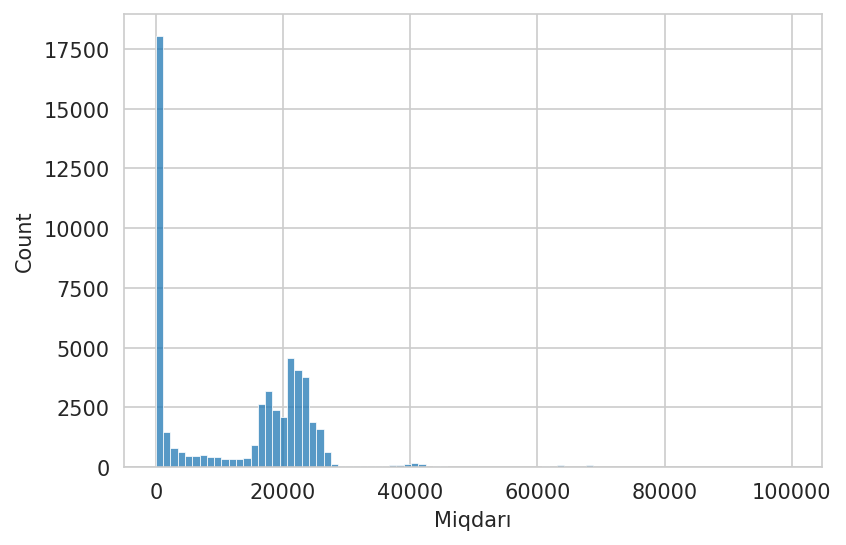

In [ ]:
plt.figure(dpi=150)
sns.histplot(df[df['Miqdarı']<100000]['Miqdarı'])

In [ ]:
#df[df['Miqdarı']>100000]

In [ ]:
df['Ölçü vaxidi'].unique()

array(['kq', 'əd', 'kq N', 'l', 'l. 100% spirt', '1000 əd', 'm2', 'q',
       'cüt', 'm3', '1000 kVt.saat', 'Kİ', 'kq 90% q/m', 'kq K2O'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


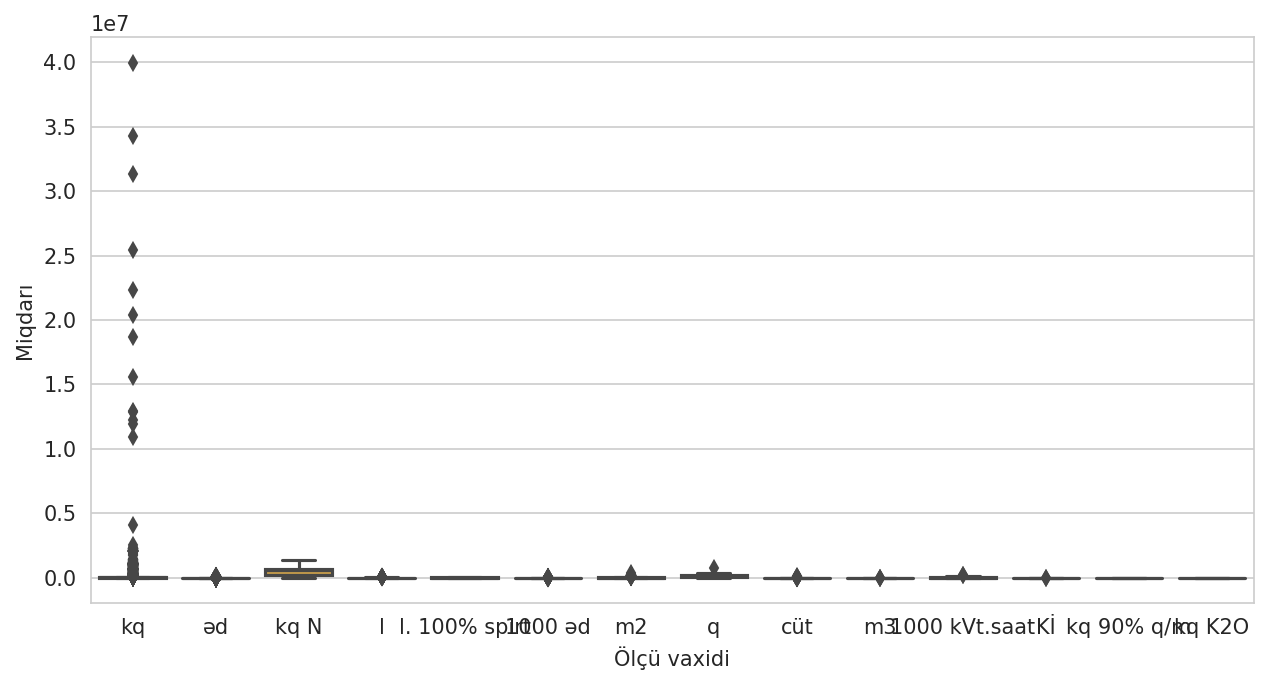

In [ ]:
plt.figure(dpi=150, figsize=(10, 5))
sns.boxplot(df['Ölçü vaxidi'], df['Miqdarı'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


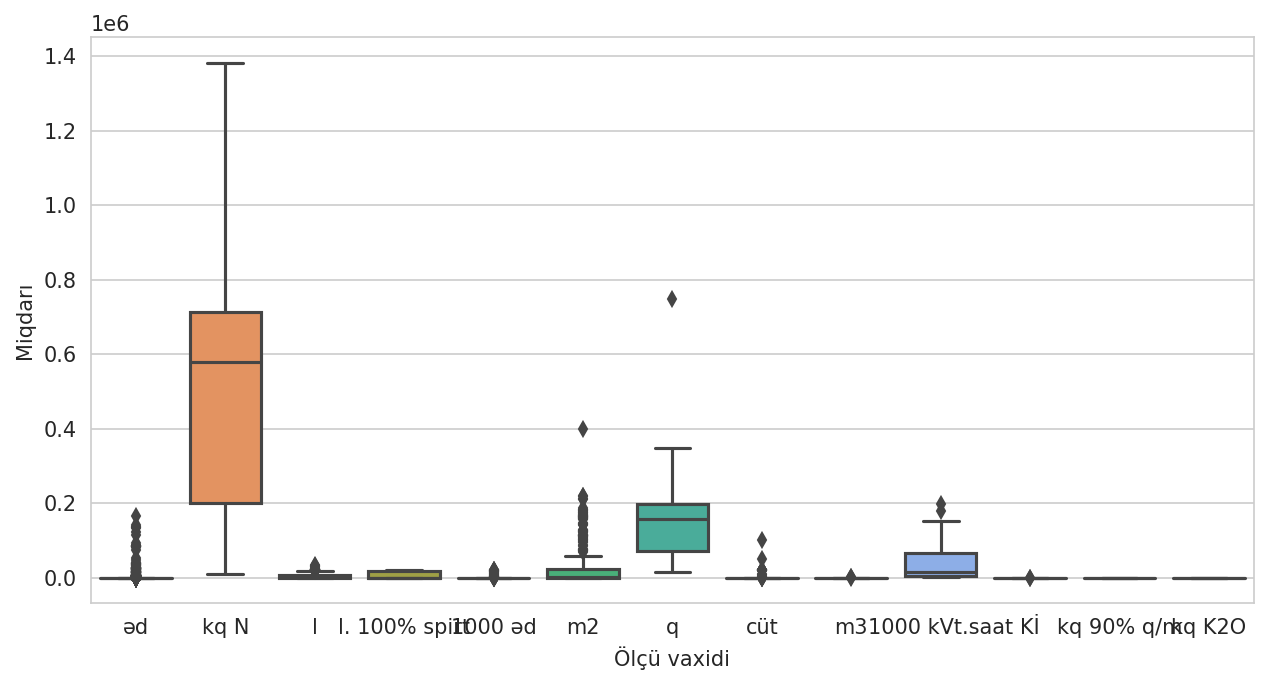

In [ ]:
plt.figure(dpi=150, figsize=(10, 5))
temp = df[df['Ölçü vaxidi'] != 'kq']
sns.boxplot(temp['Ölçü vaxidi'], temp['Miqdarı'])

## Analysis of missing values
<br> We have to take into consideration that Count of product (Miqdarı), Unit price of product (Vahidin qiyməti) and Final price of transaction are parts of one expression (count_of_product * unit_price = final_price).
<br> So we have to first of all see, if we can calculate missing values if two other values of expression are available

In [ ]:
# df['unit_price_manat'] = df['Tam qiyməti manatla']/df['Miqdarı']
# df['unit_price_usd'] = df['unit_price_manat'] * 1.7
# df['miqdari1'] = df['Tam qiyməti manatla'] / df['unit_price_manat']

In [ ]:
na_df = df.isna().sum().reset_index() # count of missing values according to variables
na_df.columns.values[1] = 'count_of_missing_values'
na_df[na_df['count_of_missing_values']>0]

,index,count_of_missing_values
9,Miqdarı,86
11,Tam qiyməti manatla,74
12,ABŞ dolları ilə,74
13,Vahidinin qiyməti (ABŞ dolları ilə),157
14,Tərəfdaş ölkə,46
15,İstehsalçı ölkə,58


In [ ]:
# df[
#    pd.notna(df['unit_price_usd']) &
#    pd.isna(df['Vahidinin qiyməti (ABŞ dolları ilə)'])
# ].head(3).iloc[:, 8:] # all values are infinite, because count is 0

In [ ]:
# df[df['Vahidinin qiyməti (ABŞ dolları ilə)'].isna()]['Miqdarı'].value_counts()#/174*100 
# main reason why it is missing
# is because count of product is zero

In [ ]:
# if one part of expression is missing but others not
# everytime one should be isna
# df[
#    pd.notna(df['Miqdarı']) &
#    pd.notna(df['unit_price_manat']) &
#    pd.isna(df['Tam qiyməti manatla'])
# ]

### We will try to impute Miqdari variable first of all
We will find which products codes have missing values <br> Then we will group by according to those codes variables of year, month, producer, partner country and compare mean, max and min values 
<br> (we have to create variables year and month initially)
<br> Also, We have to know that Vahidin qiyməti and Miqdarı are independent raw variables, others, such as Tam qiyməti are formed from other variables by multiplying (the same is for $ prices - currency exchange rate is 1.7)

In [ ]:
df['Bəyannamənin tarixi'].head()

0   2020-01-01
1   2020-01-02
2   2020-01-03
3   2020-01-03
4   2020-01-04
Name: Bəyannamənin tarixi, dtype: datetime64[ns]

In [ ]:
df['Bəyannamənin tarixi'].apply(lambda x: x.year).head()

0    2020
1    2020
2    2020
3    2020
4    2020
Name: Bəyannamənin tarixi, dtype: int64

In [ ]:
df['Bəyannamənin tarixi'].apply(lambda x: x.month).head()

0    1
1    1
2    1
3    1
4    1
Name: Bəyannamənin tarixi, dtype: int64

In [ ]:
df['year'] = df['Bəyannamənin tarixi'].apply(lambda x: x.year)
df['month'] = df['Bəyannamənin tarixi'].apply(lambda x: x.month)

In [ ]:
# math.isnan(df[df['Miqdarı'].isna()]['Miqdarı'].iloc[0]) # True for na

In [ ]:
# df['miqdari1'].apply(lambda x: df['Tam qiyməti manatla']/df['Miqdarı'] if math.isnan(x) else x)
# df.drop('miqdari1', axis=1, inplace=True)
# df['unit_prices_usd'] = df['Tam qiyməti manatla']/df['Miqdarı']
# df.isna().sum()

In [ ]:
df.isna().sum()

Bəyannamənin tarixi                      0
Ümumi sahə                               0
Kod 2                                    0
Ad 2                                     0
Kod 4                                    0
Ad 4                                     0
Kod 6                                    0
Ad 6                                     0
Malın kodu                               0
Miqdarı                                 86
Ölçü vaxidi                              0
Tam qiyməti manatla                     74
ABŞ dolları ilə                         74
Vahidinin qiyməti (ABŞ dolları ilə)    157
Tərəfdaş ölkə                           46
İstehsalçı ölkə                         58
Nəqliyyatın tipi                         0
year                                     0
month                                    0
dtype: int64

### Based on one product we will see how to impute missing values

In [ ]:
miqdari_na_products = df[pd.isna(df['Miqdarı'])]['Malın kodu'].unique()
print(len(miqdari_na_products))

52


In [ ]:
df[
   (df['Malın kodu'] == miqdari_na_products[0]) &
   df['Miqdarı'].isna()
].iloc[:, 7:14]

,Ad 6,Malın kodu,Miqdarı,Ölçü vaxidi,Tam qiyməti manatla,ABŞ dolları ilə,Vahidinin qiyməti (ABŞ dolları ilə)
92,Qabığı təmizlənmiş meşə fındığı,802220000,NaN,kq,NaN,NaN,NaN
93,Qabığı təmizlənmiş meşə fındığı,802220000,NaN,kq,NaN,NaN,NaN
29015,Qabığı təmizlənmiş meşə fındığı,802220000,NaN,kq,58140.0,34200.0,NaN
29112,Qabığı təmizlənmiş meşə fındığı,802220000,NaN,kq,NaN,NaN,NaN


In [ ]:
partner_countries = df[
   (df['Malın kodu'] == miqdari_na_products[0]) &
   df['Miqdarı'].isna()
]['Tərəfdaş ölkə'].unique() # just for one product
partner_countries

array(['RUSİYA', 'ALMANİYA', 'QAZAXISTAN'], dtype=object)

In [ ]:
producer_countries = df[
   (df['Malın kodu'] == miqdari_na_products[0]) &
   df['Miqdarı'].isna()
]['İstehsalçı ölkə'].unique() # just for one product
producer_countries

array(['AZƏRBAYCAN'], dtype=object)

In [ ]:
year_of_transaction = df[
   (df['Malın kodu'] == miqdari_na_products[0]) &
   df['Miqdarı'].isna()
]['year'].unique() # just for one product
year_of_transaction

array([2020, 2021])

In [ ]:
month_of_transaction = df[
   (df['Malın kodu'] == miqdari_na_products[0]) &
   df['Miqdarı'].isna()
]['month'].unique() # just for one product
month_of_transaction

array([1, 2])

In [ ]:
temp = df[~(df['Miqdarı'].isna())]
temp = temp[temp['Malın kodu'] == miqdari_na_products[0]]
temp = temp[temp['Tərəfdaş ölkə'].isin(partner_countries)]
temp = temp[temp['İstehsalçı ölkə'].isin(producer_countries)]
temp = temp[temp['month'].isin(month_of_transaction)]

In [ ]:
temp.groupby(
    ['Malın kodu', 'year', 'month', 'Ölçü vaxidi', 'İstehsalçı ölkə', 'Tərəfdaş ölkə']
).agg({'Miqdarı': ['mean', 'max', 'min', 'std']}).round()

Miqdarı  ...        
                                                                    mean  ...     std
Malın kodu year month Ölçü vaxidi İstehsalçı ölkə Tərəfdaş ölkə           ...        
802220000  2020 1     kq          AZƏRBAYCAN      ALMANİYA       19857.0  ...  2983.0
                                                  QAZAXISTAN     21500.0  ...     NaN
                                                  RUSİYA         19049.0  ...  5045.0
                2     kq          AZƏRBAYCAN      ALMANİYA       20000.0  ...     0.0
                                                  QAZAXISTAN     21500.0  ...     0.0
                                                  RUSİYA         18814.0  ...  5409.0
           2021 1     kq          AZƏRBAYCAN      ALMANİYA       20364.0  ...   809.0
                                                  QAZAXISTAN     20170.0  ...  1264.0
                                                  RUSİYA         18754.0  ...  4381.0
                2     kq          AZƏRBAYCAN      ALMANİYA       20250.0  ...   683.0
                                                  QAZAXISTAN     18000.0  ...     NaN
                                                  RUSİYA         18295.0  ...  6904.0

[12 rows x 4 columns]

In [ ]:
indexes_for_checking = df.index[
   (df['Malın kodu'] == miqdari_na_products[0]) &
   df['Miqdarı'].isna()
].tolist()
indexes_for_checking

[92, 93, 29015, 29112]

In [ ]:
df.isna().sum()

Bəyannamənin tarixi                      0
Ümumi sahə                               0
Kod 2                                    0
Ad 2                                     0
Kod 4                                    0
Ad 4                                     0
Kod 6                                    0
Ad 6                                     0
Malın kodu                               0
Miqdarı                                 86
Ölçü vaxidi                              0
Tam qiyməti manatla                     74
ABŞ dolları ilə                         74
Vahidinin qiyməti (ABŞ dolları ilə)    157
Tərəfdaş ölkə                           46
İstehsalçı ölkə                         58
Nəqliyyatın tipi                         0
dtype: int64

In [ ]:
df['count'] = df['Miqdarı'].fillna(
    df.groupby(
    ['Malın kodu', 'year', 'month', 'Ölçü vaxidi', 'İstehsalçı ölkə', 'Tərəfdaş ölkə']
  )['Miqdarı'].transform('mean').round()
)

In [ ]:
df.iloc[indexes_for_checking, 9:]

,Miqdarı,Ölçü vaxidi,Tam qiyməti manatla,ABŞ dolları ilə,Vahidinin qiyməti (ABŞ dolları ilə),Tərəfdaş ölkə,İstehsalçı ölkə,Nəqliyyatın tipi,year,month,count
92,NaN,kq,NaN,NaN,NaN,RUSİYA,AZƏRBAYCAN,Avtomobil nəqliyyatı vasitələri,2020,1,19049.0
93,NaN,kq,NaN,NaN,NaN,ALMANİYA,AZƏRBAYCAN,Avtomobil nəqliyyatı vasitələri,2020,1,19857.0
29015,NaN,kq,58140.0,34200.0,NaN,QAZAXISTAN,AZƏRBAYCAN,Avtomobil nəqliyyatı vasitələri,2021,2,18000.0
29112,NaN,kq,NaN,NaN,NaN,ALMANİYA,AZƏRBAYCAN,Avtomobil nəqliyyatı vasitələri,2021,2,20250.0


In [ ]:
df.isna().sum()

Bəyannamənin tarixi                      0
Ümumi sahə                               0
Kod 2                                    0
Ad 2                                     0
Kod 4                                    0
Ad 4                                     0
Kod 6                                    0
Ad 6                                     0
Malın kodu                               0
Miqdarı                                 86
Ölçü vaxidi                              0
Tam qiyməti manatla                     74
ABŞ dolları ilə                         74
Vahidinin qiyməti (ABŞ dolları ilə)    157
Tərəfdaş ölkə                           46
İstehsalçı ölkə                         58
Nəqliyyatın tipi                         0
year                                     0
month                                    0
count                                   21
dtype: int64

In [ ]:
df['count'] = df['Miqdarı'].fillna(
    df.groupby(
    ['Malın kodu', 'year', 'month', 'Ölçü vaxidi', 'İstehsalçı ölkə', 'Tərəfdaş ölkə']
  )['Miqdarı'].transform('mean').round()
)

In [ ]:
df['count2'] = df['Miqdarı'].fillna(
    df.groupby(
    'Malın kodu'
  )['Miqdarı'].transform('mean').round()
)

In [ ]:
df.isna().sum()

Bəyannamənin tarixi                      0
Ümumi sahə                               0
Kod 2                                    0
Ad 2                                     0
Kod 4                                    0
Ad 4                                     0
Kod 6                                    0
Ad 6                                     0
Malın kodu                               0
Miqdarı                                 86
Ölçü vaxidi                              0
Tam qiyməti manatla                     74
ABŞ dolları ilə                         74
Vahidinin qiyməti (ABŞ dolları ilə)    157
Tərəfdaş ölkə                           46
İstehsalçı ölkə                         58
Nəqliyyatın tipi                         0
year                                     0
month                                    0
count                                   21
count2                                   3
dtype: int64

In [ ]:
df[df['count'].isna() & pd.notna(df['count2'])].iloc[:, 9:].head()

,Miqdarı,Ölçü vaxidi,Tam qiyməti manatla,ABŞ dolları ilə,Vahidinin qiyməti (ABŞ dolları ilə),Tərəfdaş ölkə,İstehsalçı ölkə,Nəqliyyatın tipi,year,month,count,count2
32862,NaN,əd,1190.0,700.0,NaN,SYANQAN (HONKONQ),ABŞ,Hava nəqliyyatı vasitələri,2021,3,NaN,1.0
32864,NaN,kq,1241.0,730.0,NaN,SYANQAN (HONKONQ),FRANSA,Hava nəqliyyatı vasitələri,2021,3,NaN,96.0
32865,NaN,kq,4760.0,2800.0,NaN,SYANQAN (HONKONQ),ABŞ,Hava nəqliyyatı vasitələri,2021,3,NaN,0.0
32866,NaN,əd,10200.0,6000.0,NaN,ÖZBƏKİSTAN,TÜRKİYƏ,Avtomobil nəqliyyatı vasitələri,2020,3,NaN,2.0
53325,NaN,əd,NaN,NaN,NaN,İTALİYA,ALMANİYA,Hava nəqliyyatı vasitələri,2020,4,NaN,5.0


In [ ]:
df['count3'] = df['Miqdarı'].fillna(
    df.groupby(
    'Kod 6'
  )['Miqdarı'].transform('mean').round()
)

In [ ]:
df.isna().sum()

Bəyannamənin tarixi                      0
Ümumi sahə                               0
Kod 2                                    0
Ad 2                                     0
Kod 4                                    0
Ad 4                                     0
Kod 6                                    0
Ad 6                                     0
Malın kodu                               0
Miqdarı                                 86
Ölçü vaxidi                              0
Tam qiyməti manatla                     74
ABŞ dolları ilə                         74
Vahidinin qiyməti (ABŞ dolları ilə)    157
Tərəfdaş ölkə                           46
İstehsalçı ölkə                         58
Nəqliyyatın tipi                         0
year                                     0
month                                    0
count                                   21
count2                                   3
count3                                   1
dtype: int64

In [ ]:
df['count4'] = df['Miqdarı'].fillna(
    df.groupby(
    'Kod 4'
  )['Miqdarı'].transform('mean').round()
)
df.isna().sum() # so we imputed count variable

Bəyannamənin tarixi                      0
Ümumi sahə                               0
Kod 2                                    0
Ad 2                                     0
Kod 4                                    0
Ad 4                                     0
Kod 6                                    0
Ad 6                                     0
Malın kodu                               0
Miqdarı                                 86
Ölçü vaxidi                              0
Tam qiyməti manatla                     74
ABŞ dolları ilə                         74
Vahidinin qiyməti (ABŞ dolları ilə)    157
Tərəfdaş ölkə                           46
İstehsalçı ölkə                         58
Nəqliyyatın tipi                         0
year                                     0
month                                    0
count                                   21
count2                                   3
count3                                   1
count4                                   0
dtype: int6

In [ ]:
# df[
#    pd.notna(df['count4']) &
#    pd.notna(df['unit_price_manat']) &
#    pd.isna(df['Tam qiyməti manatla'])
# ]

In [ ]:
# For computational reasons we have to change 0 count to 1
df['count5'] = df['count4'].apply(lambda x: x+1 if x == 0 else x)

In [ ]:
df['unit_price_azn'] = df['Tam qiyməti manatla']/df['count5']

In [ ]:
# df.drop('final_price', axis=1, inplace = True)
checkpoint_1 = df.copy()

In [ ]:
df.isna().sum()

Bəyannamənin tarixi                      0
Ümumi sahə                               0
Kod 2                                    0
Ad 2                                     0
Kod 4                                    0
Ad 4                                     0
Kod 6                                    0
Ad 6                                     0
Malın kodu                               0
Miqdarı                                 86
Ölçü vaxidi                              0
Tam qiyməti manatla                     74
ABŞ dolları ilə                         74
Vahidinin qiyməti (ABŞ dolları ilə)    157
Tərəfdaş ölkə                           46
İstehsalçı ölkə                         58
Nəqliyyatın tipi                         0
year                                     0
month                                    0
count                                   21
count2                                   3
count3                                   1
count4                                   0
count5     

In [ ]:
unit_price_na_product_codes = df[df['unit_price_azn'].isna()]["Malın kodu"].unique()

In [ ]:
df['unit_price_azn2'] = df['unit_price_azn'].fillna(
    df.groupby(
    ['Malın kodu', 'year', 'month', 'Ölçü vaxidi', 'İstehsalçı ölkə', 'Tərəfdaş ölkə']
  )['unit_price_azn'].transform('mean').round(2)
)

In [ ]:
df.isna().sum()

Bəyannamənin tarixi                      0
Ümumi sahə                               0
Kod 2                                    0
Ad 2                                     0
Kod 4                                    0
Ad 4                                     0
Kod 6                                    0
Ad 6                                     0
Malın kodu                               0
Miqdarı                                 86
Ölçü vaxidi                              0
Tam qiyməti manatla                     74
ABŞ dolları ilə                         74
Vahidinin qiyməti (ABŞ dolları ilə)    157
Tərəfdaş ölkə                           46
İstehsalçı ölkə                         58
Nəqliyyatın tipi                         0
year                                     0
month                                    0
count                                   21
count2                                   3
count3                                   1
count4                                   0
count5     

In [ ]:
df['unit_price_azn3'] = df['unit_price_azn2'].fillna(
    df.groupby(
    ['Malın kodu', 'year', 'month', 'Ölçü vaxidi', 'İstehsalçı ölkə']
  )['unit_price_azn'].transform('mean').round(2)
)
df.isna().sum()

Bəyannamənin tarixi                      0
Ümumi sahə                               0
Kod 2                                    0
Ad 2                                     0
Kod 4                                    0
Ad 4                                     0
Kod 6                                    0
Ad 6                                     0
Malın kodu                               0
Miqdarı                                 86
Ölçü vaxidi                              0
Tam qiyməti manatla                     74
ABŞ dolları ilə                         74
Vahidinin qiyməti (ABŞ dolları ilə)    157
Tərəfdaş ölkə                           46
İstehsalçı ölkə                         58
Nəqliyyatın tipi                         0
year                                     0
month                                    0
count                                   21
count2                                   3
count3                                   1
count4                                   0
count5     

In [ ]:
df['unit_price_azn4'] = df['unit_price_azn3'].fillna(
    df.groupby(
    ['Malın kodu', 'year', 'İstehsalçı ölkə']
  )['unit_price_azn'].transform('mean').round(2)
)
df.isna().sum()

Bəyannamənin tarixi                      0
Ümumi sahə                               0
Kod 2                                    0
Ad 2                                     0
Kod 4                                    0
Ad 4                                     0
Kod 6                                    0
Ad 6                                     0
Malın kodu                               0
Miqdarı                                 86
Ölçü vaxidi                              0
Tam qiyməti manatla                     74
ABŞ dolları ilə                         74
Vahidinin qiyməti (ABŞ dolları ilə)    157
Tərəfdaş ölkə                           46
İstehsalçı ölkə                         58
Nəqliyyatın tipi                         0
year                                     0
month                                    0
count                                   21
count2                                   3
count3                                   1
count4                                   0
count5     

In [ ]:
df['unit_price_azn5'] = df['unit_price_azn4'].fillna(
    df.groupby(
    ['Malın kodu', 'İstehsalçı ölkə']
  )['unit_price_azn'].transform('mean').round(2)
)
df.isna().sum()

Bəyannamənin tarixi                      0
Ümumi sahə                               0
Kod 2                                    0
Ad 2                                     0
Kod 4                                    0
Ad 4                                     0
Kod 6                                    0
Ad 6                                     0
Malın kodu                               0
Miqdarı                                 86
Ölçü vaxidi                              0
Tam qiyməti manatla                     74
ABŞ dolları ilə                         74
Vahidinin qiyməti (ABŞ dolları ilə)    157
Tərəfdaş ölkə                           46
İstehsalçı ölkə                         58
Nəqliyyatın tipi                         0
year                                     0
month                                    0
count                                   21
count2                                   3
count3                                   1
count4                                   0
count5     

In [ ]:
df['unit_price_azn6'] = df['unit_price_azn5'].fillna(
    df.groupby(
    ['Kod 4', 'İstehsalçı ölkə']
  )['unit_price_azn'].transform('mean').round(2)
)
df.isna().sum()

Bəyannamənin tarixi                      0
Ümumi sahə                               0
Kod 2                                    0
Ad 2                                     0
Kod 4                                    0
Ad 4                                     0
Kod 6                                    0
Ad 6                                     0
Malın kodu                               0
Miqdarı                                 86
Ölçü vaxidi                              0
Tam qiyməti manatla                     74
ABŞ dolları ilə                         74
Vahidinin qiyməti (ABŞ dolları ilə)    157
Tərəfdaş ölkə                           46
İstehsalçı ölkə                         58
Nəqliyyatın tipi                         0
year                                     0
month                                    0
count                                   21
count2                                   3
count3                                   1
count4                                   0
count5     

In [ ]:
df['unit_price_azn7'] = df['unit_price_azn6'].fillna(
    df.groupby(
    ['Kod 2', 'İstehsalçı ölkə']
  )['unit_price_azn'].transform('mean').round(2)
)
df.isna().sum()

Bəyannamənin tarixi                      0
Ümumi sahə                               0
Kod 2                                    0
Ad 2                                     0
Kod 4                                    0
Ad 4                                     0
Kod 6                                    0
Ad 6                                     0
Malın kodu                               0
Miqdarı                                 86
Ölçü vaxidi                              0
Tam qiyməti manatla                     74
ABŞ dolları ilə                         74
Vahidinin qiyməti (ABŞ dolları ilə)    157
Tərəfdaş ölkə                           46
İstehsalçı ölkə                         58
Nəqliyyatın tipi                         0
year                                     0
month                                    0
count                                   21
count2                                   3
count3                                   1
count4                                   0
count5     

In [ ]:
df['final_price_azn'] = round(df['count5'] * df['unit_price_azn7'])
df['final_price_usd'] = round(df['final_price_azn'] / 1.7, 2)
df['unit_price_usd'] = round(df['unit_price_azn7'] / 1.7, 2)

In [ ]:
checkpoint_2 = df.copy()

In [ ]:
df = checkpoint_2.copy()

In [ ]:
df.columns.values

array(['Bəyannamənin tarixi', 'Ümumi sahə', 'Kod 2', 'Ad 2', 'Kod 4',
       'Ad 4', 'Kod 6', 'Ad 6', 'Malın kodu', 'Miqdarı', 'Ölçü vaxidi',
       'Tam qiyməti manatla', 'ABŞ dolları ilə',
       'Vahidinin qiyməti (ABŞ dolları ilə)', 'Tərəfdaş ölkə',
       'İstehsalçı ölkə', 'Nəqliyyatın tipi', 'year', 'month', 'count',
       'count2', 'count3', 'count4', 'count5', 'unit_price_azn',
       'unit_price_azn2', 'unit_price_azn3', 'unit_price_azn4',
       'unit_price_azn5', 'unit_price_azn6', 'unit_price_azn7',
       'final_price_azn', 'final_price_usd', 'unit_price_usd'],
      dtype=object)

In [ ]:
df = df[
   ['Bəyannamənin tarixi', 'Ümumi sahə', 'Kod 2', 'Ad 2',
       'Kod 4', 'Ad 4', 'Kod 6', 'Ad 6', 'Malın kodu',
       'Ölçü vaxidi', 'Tərəfdaş ölkə',
       'İstehsalçı ölkə', 'Nəqliyyatın tipi', 'year', 'month', 'count4', 'count5',
       'unit_price_azn7','final_price_azn', 'final_price_usd', 'unit_price_usd']]

In [ ]:
df.head()

,Bəyannamənin tarixi,Ümumi sahə,Kod 2,Ad 2,Kod 4,Ad 4,Kod 6,Ad 6,Malın kodu,Ölçü vaxidi,Tərəfdaş ölkə,İstehsalçı ölkə,Nəqliyyatın tipi,year,month,count4,count5,unit_price_azn7,final_price_azn,final_price_usd,unit_price_usd
0,2020-01-01,Sənaye məhsulları,39,Plastmassa və onlardan hazırlanan məmulatlar,3901,"Etilen polimerləri, ilkin formalarda",390110,"Xüsusi kütləsi 0,94-dən az olan ilkin formalı ...",3901109000,kq,ÇİN,AZƏRBAYCAN,Avtomobil nəqliyyatı vasitələri,2020,1,22500.0,22500.0,1.162800,26163.0,15390.00,0.68
1,2020-01-02,Sənaye məhsulları,39,Plastmassa və onlardan hazırlanan məmulatlar,3901,"Etilen polimerləri, ilkin formalarda",390110,"Xüsusi kütləsi 0,94-dən az olan ilkin formalı ...",3901109000,kq,ÇİN,AZƏRBAYCAN,Avtomobil nəqliyyatı vasitələri,2020,1,22500.0,22500.0,1.162800,26163.0,15390.00,0.68
2,2020-01-03,Sənaye məhsulları,39,Plastmassa və onlardan hazırlanan məmulatlar,3901,"Etilen polimerləri, ilkin formalarda",390110,"Xüsusi kütləsi 0,94-dən az olan ilkin formalı ...",3901109000,kq,ÇİN,AZƏRBAYCAN,Avtomobil nəqliyyatı vasitələri,2020,1,22500.0,22500.0,1.162800,26163.0,15390.00,0.68
3,2020-01-03,Sənaye məhsulları,39,Plastmassa və onlardan hazırlanan məmulatlar,3901,"Etilen polimerləri, ilkin formalarda",390110,"Xüsusi kütləsi 0,94-dən az olan ilkin formalı ...",3901109000,kq,TÜRKİYƏ,AZƏRBAYCAN,Avtomobil nəqliyyatı vasitələri,2020,1,22500.0,22500.0,1.215416,27347.0,16086.47,0.71
4,2020-01-04,Sənaye məhsulları,39,Plastmassa və onlardan hazırlanan məmulatlar,3901,"Etilen polimerləri, ilkin formalarda",390110,"Xüsusi kütləsi 0,94-dən az olan ilkin formalı ...",3901109000,kq,ÇİN,AZƏRBAYCAN,Avtomobil nəqliyyatı vasitələri,2020,1,22500.0,22500.0,1.162800,26163.0,15390.00,0.68


In [ ]:
df.isna().sum() # for imputing these variables I need more time and data exploration

Bəyannamənin tarixi     0
Ümumi sahə              0
Kod 2                   0
Ad 2                    0
Kod 4                   0
Ad 4                    0
Kod 6                   0
Ad 6                    0
Malın kodu              0
Ölçü vaxidi             0
Tərəfdaş ölkə          46
İstehsalçı ölkə        58
Nəqliyyatın tipi        0
year                    0
month                   0
count4                  0
count5                  0
unit_price_azn7         0
final_price_azn         0
final_price_usd         0
unit_price_usd          0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
product_codes =  df[df['İstehsalçı ölkə'].isna()]['Malın kodu'].unique()

In [ ]:
df[df['Malın kodu']==product_codes[0]].iloc[:, 7:]

,Ad 6,Malın kodu,Ölçü vaxidi,Tərəfdaş ölkə,İstehsalçı ölkə,Nəqliyyatın tipi,year,month,count4,count5,unit_price_azn7,final_price_azn,final_price_usd,unit_price_usd
7468,Vulkanlaşdırılmış rezindən digər ötürücü qayışlar,4010390000,kq,GÜRCÜSTAN,ARGENTİNA,Avtomobil nəqliyyatı vasitələri,2020,2,0.30,0.30,63.200000,19.0,11.18,37.18
7469,Vulkanlaşdırılmış rezindən digər ötürücü qayışlar,4010390000,kq,GÜRCÜSTAN,ALMANİYA,Avtomobil nəqliyyatı vasitələri,2020,2,2.70,2.70,55.759259,151.0,88.82,32.80
7470,Vulkanlaşdırılmış rezindən digər ötürücü qayışlar,4010390000,kq,GÜRCÜSTAN,İTALİYA,Avtomobil nəqliyyatı vasitələri,2020,2,3.20,3.20,77.828125,249.0,146.47,45.78
7471,Vulkanlaşdırılmış rezindən digər ötürücü qayışlar,4010390000,kq,GÜRCÜSTAN,NaN,Avtomobil nəqliyyatı vasitələri,2020,2,0.90,0.90,17.722222,16.0,9.41,10.42
40689,Vulkanlaşdırılmış rezindən digər ötürücü qayışlar,4010390000,kq,TÜRKMƏNİSTAN,ABŞ,Dəniz nəqliyyatı vasitələri,2021,4,0.34,0.34,489.647059,166.0,97.65,288.03
48759,Vulkanlaşdırılmış rezindən digər ötürücü qayışlar,4010390000,kq,BÖYÜK BRİTANİYA,BÖYÜK BRİTANİYA,Hava nəqliyyatı vasitələri,2021,3,3.22,3.22,88.695652,286.0,168.24,52.17
51197,Vulkanlaşdırılmış rezindən digər ötürücü qayışlar,4010390000,kq,BİRLƏŞMİŞ ƏRƏB ƏM,NORVEÇ,Avtomobil nəqliyyatı vasitələri,2021,3,2.00,2.00,299.465000,599.0,352.35,176.16
52808,Vulkanlaşdırılmış rezindən digər ötürücü qayışlar,4010390000,kq,BÖYÜK BRİTANİYA,ALMANİYA,Avtomobil nəqliyyatı vasitələri,2020,1,3.17,3.17,103.470032,328.0,192.94,60.86


In [ ]:
df[
   (df['Malın kodu'] == product_codes[0]) &

]['İstehsalçı ölkə'].unique()

array(['ÇİN', nan, 'TAYVAN', 'ABŞ', 'ALMANİYA', 'NİDERLAND', 'RUSİYA'],
      dtype=object)

In [ ]:
df = df.reset_index(drop = True)

## Some visualisations

In [ ]:
producer_countries = df['İstehsalçı ölkə'].unique()

In [ ]:
len(producer_countries)

88

In [ ]:
(df.groupby('İstehsalçı ölkə').sum()/1000)['final_price_azn'].round().reset_index().sort_values(
    'final_price_azn', ascending=False)

,İstehsalçı ölkə,final_price_azn
5,AZƏRBAYCAN,2044762.0
0,ABŞ,359469.0
75,ÇİN,108705.0
1,ALMANİYA,86718.0
11,BÖYÜK BRİTANİYA,77304.0
...,...,...
17,FRANSA GIVIMEYASI,0.0
22,KAMBOCA,0.0
52,QUAM,0.0
45,OMAN,0.0


In [ ]:
a = 0
temp = df[df['İstehsalçı ölkə'] == producer_countries[a]]
temp = temp.groupby('Bəyannamənin tarixi').sum().reset_index()
# temp = temp.groupby(['Bəyannamənin tarixi', 'year', 'month']).sum().reset_index()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


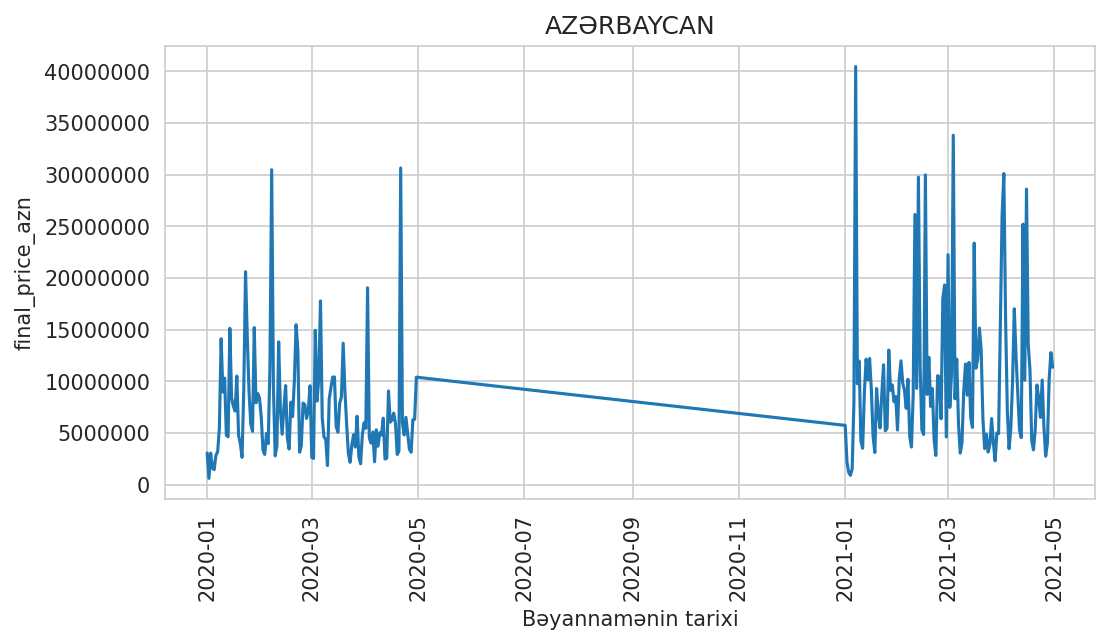

In [ ]:
plt.figure(dpi=150, figsize=(8, 4))
plt.title(producer_countries[a])
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain')
sns.lineplot(temp['Bəyannamənin tarixi'], temp['final_price_azn'])

In [ ]:
list(producer_countries).index("AZƏRBAYCAN")

0

In [ ]:
df['unit_price_azn7'] = round(df['unit_price_azn7'], 2)

In [ ]:
df.to_excel("/content/drive/MyDrive/AzPromo/Preprocessed_data.xlsx")

In [ ]:
df_aze = df[df['İstehsalçı ölkə'] == 'AZƏRBAYCAN'].sort_values('Bəyannamənin tarixi').reset_index(drop=True)

In [ ]:
df_aze_forecasting_data = df_aze.groupby('Bəyannamənin tarixi').sum()['final_price_usd'].reset_index()
df_aze_forecasting_data

,Bəyannamənin tarixi,final_price_usd
0,2020-01-01,1796177.04
1,2020-01-02,351530.56
2,2020-01-03,1791654.20
3,2020-01-04,926612.98
4,2020-01-05,849528.84
...,...,...
236,2021-04-26,1613395.31
237,2021-04-27,2373002.95
238,2021-04-28,6002306.57
239,2021-04-29,7510963.55


In [ ]:
df_aze_forecasting_data.to_excel('/content/drive/MyDrive/AzPromo/forecasting_data_aze.xlsx')